In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns



## Obtención de datos

Se realizo una aplicación móvil para la obtención de datos, en el cual 50 usuarios tuvieron interacción durante 1 mes, los usuarios calificaron a distintos ejercicios que se tenían en el aplicativo, los usuarios que se sometieron a prueba rondaban de la edad de 18 a 32 años tanto hombres como mujeres.
Como la recolección de datos se tenía que realizar en 30 días, los limite a 50 ejercicios, calificándolos en la mayoría de los días.
Estos ejercicios se obtuvieron en kaggle [aquí](https://www.kaggle.com/datasets/edoardoba/fitness-exercises-with-animations).
## **Nueva sección**



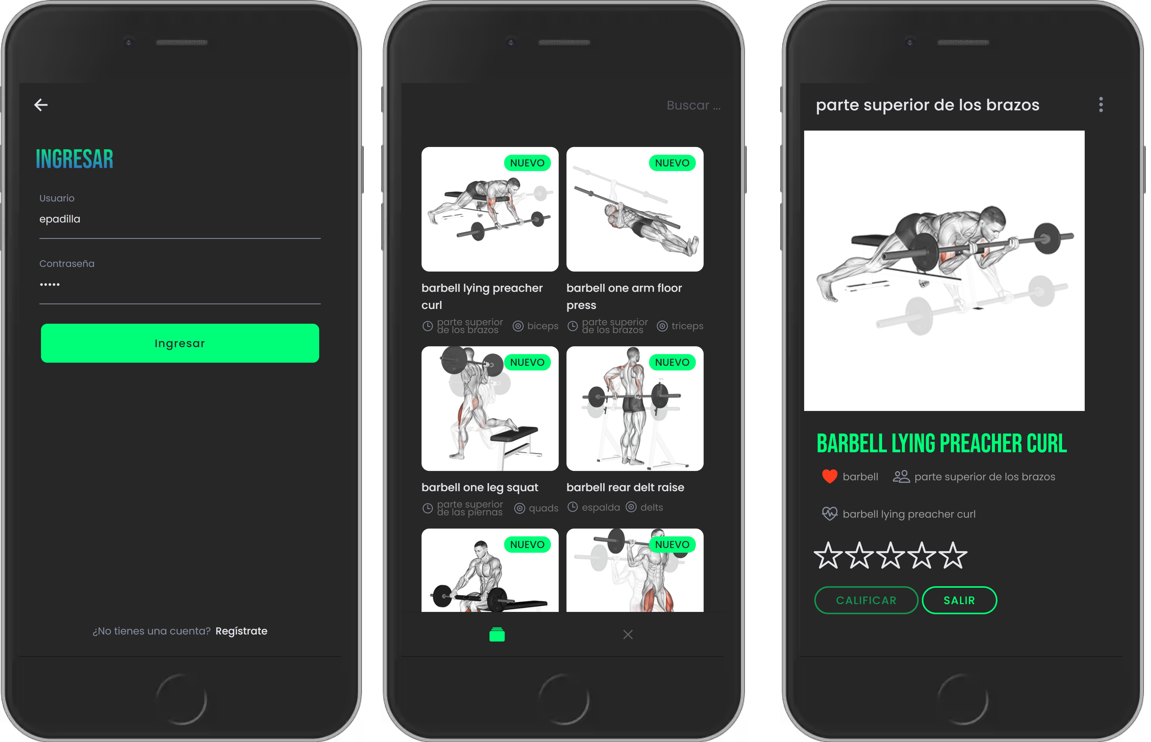
Codigo Fuente Publico, para futuras actualizaciones 
*  [Backend Nestjs](https://github.com/Eduardo2505/gym-tesis-back_public.git)
*  [Aplicacion Movil Ionic Nestjs](https://github.com/Eduardo2505/ionic-fitness-test-public.git)



In [ ]:
exercise = pd.read_csv('https://github.com/Eduardo2505/data-gym-tesis/blob/main/exercise.tsv?raw=true',encoding='utf-8', sep = '\t')
exercise.head(10)

,id,bodyPart,equipment,gifUrl,name_ejercise,target,estatus
0,59,parte superior de los brazos,barbell,http://d205bpvrqc9yn1.cloudfront.net/0059.gif,barbell lying preacher curl,biceps,1
1,65,parte superior de los brazos,barbell,http://d205bpvrqc9yn1.cloudfront.net/0065.gif,barbell one arm floor press,triceps,1
2,68,parte superior de las piernas,barbell,http://d205bpvrqc9yn1.cloudfront.net/0068.gif,barbell one leg squat,quads,1
3,75,espalda,barbell,http://d205bpvrqc9yn1.cloudfront.net/0075.gif,barbell rear delt raise,delts,1
4,88,parte inferior de las piernas,barbell,http://d205bpvrqc9yn1.cloudfront.net/0088.gif,barbell seated calf raise,calves,1
5,97,parte superior de las piernas,barbell,http://d205bpvrqc9yn1.cloudfront.net/0097.gif,barbell side split squat v. 2,quads,1
6,98,parte superior de las piernas,barbell,http://d205bpvrqc9yn1.cloudfront.net/0098.gif,barbell side split squat,quads,1
7,99,parte superior de las piernas,barbell,http://d205bpvrqc9yn1.cloudfront.net/0099.gif,barbell single leg split squat,quads,1
8,105,espalda,barbell,http://d205bpvrqc9yn1.cloudfront.net/0105.gif,barbell standing bradford press,delts,1
9,109,parte superior de los brazos,barbell,http://d205bpvrqc9yn1.cloudfront.net/0109.gif,barbell standing overhead triceps extension,triceps,1


In [ ]:
exercise.shape

(58, 7)

In [ ]:
exercise.shape

(58, 7)

In [ ]:
exercise.columns

Index(['id', 'bodyPart', 'equipment', 'gifUrl', 'name_ejercise', 'target',
       'estatus'],
      dtype='object')

Como nuestra implementacion , es para recomendar el el nombre del ejecicio, las columnas como gifUrl,estatus,equipment y bodyPart no son necesarias por lo tanto tenemos que eliminarlas

In [ ]:
exercise_name_id = exercise.drop(['gifUrl','target','equipment','estatus','bodyPart'],axis=1)


In [ ]:
exercise_name_id.head(10)

,id,name_ejercise
0,59,barbell lying preacher curl
1,65,barbell one arm floor press
2,68,barbell one leg squat
3,75,barbell rear delt raise
4,88,barbell seated calf raise
5,97,barbell side split squat v. 2
6,98,barbell side split squat
7,99,barbell single leg split squat
8,105,barbell standing bradford press
9,109,barbell standing overhead triceps extension


In [ ]:
user_data = pd.read_csv('https://github.com/Eduardo2505/data-gym-tesis/blob/main/user_data.tsv?raw=true',encoding='utf-8', sep = '\t')
user_data.head(10)

,iduser,fecha_nacimiento,sex
0,1247,1990-02-21,1
1,1248,1996-07-25,0
2,1249,2002-05-18,0
3,1251,1997-05-10,1
4,1252,1994-05-04,0
5,1253,2000-11-15,0
6,1257,1997-01-26,0
7,1258,1990-01-14,0
8,1260,1988-07-05,1
9,1261,1987-10-15,1


Vamos calcular la edad mediante la fecha de nacimiento para seber algunas estadisticas

In [ ]:
from datetime import datetime, date 

In [ ]:
def age(born): 
    born = datetime.strptime(born, "%Y-%m-%d").date() 
    today = date.today() 
    return today.year - born.year - ((today.month,  
                                      today.day) <(born.month,  
                                                    born.day))

In [ ]:
#tes=age('1988-07-05');
user_data['edad']=user_data['fecha_nacimiento'].apply(age) 

In [ ]:
user_data.describe()

,iduser,sex,edad
count,50.000000,50.000000,50.000000
mean,1291.160000,0.640000,27.460000
std,26.804173,0.484873,4.734631
min,1247.000000,0.000000,19.000000
25%,1270.500000,0.000000,24.000000
50%,1293.500000,1.000000,26.000000
75%,1314.500000,1.000000,32.000000
max,1333.000000,1.000000,36.000000


In [ ]:
ratings = pd.read_csv('https://github.com/Eduardo2505/data-gym-tesis/blob/main/user_exercise.tsv?raw=true',encoding='utf-8', sep = '\t')
ratings.head(10)

,id,idexercise,idusergym,calificacion
0,1507,3562,1333,3
1,1508,218,1332,1
2,1509,214,1330,3
3,1510,213,1329,4
4,1511,212,1327,2
5,1512,211,1326,5
6,1513,210,1325,3
7,1514,209,1323,5
8,1515,203,1322,2
9,1516,202,1319,4


In [ ]:
ratings.describe()

,id,idexercise,idusergym,calificacion
count,818.000000,818.000000,818.000000,818.000000
mean,1915.500000,221.205379,1291.140587,2.922983
std,236.280554,488.930191,26.280402,1.394230
min,1507.000000,59.000000,1247.000000,1.000000
25%,1711.250000,115.500000,1270.000000,2.000000
50%,1915.500000,158.000000,1293.000000,3.000000
75%,2119.750000,191.000000,1315.000000,4.000000
max,2324.000000,3562.000000,1333.000000,5.000000


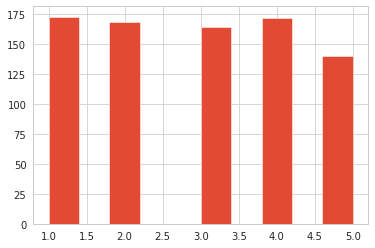

In [ ]:
ratings['calificacion'].hist()

In [ ]:
agrupar_ratings = ratings.groupby(['calificacion']).size().reset_index(name='counts')


In [ ]:
agrupar_ratings

,calificacion,counts
0,1,173
1,2,169
2,3,164
3,4,172
4,5,140


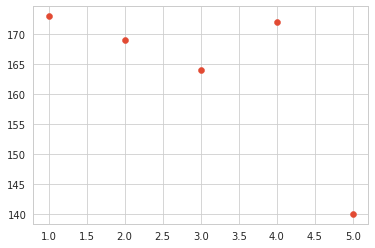

In [ ]:
plt.scatter(agrupar_ratings['calificacion'],agrupar_ratings['counts'])

# Recomendador Item-Item o Producto-Producto

En esta primera parte del laboratorio desarrollaremos un sistema de recomendacion item-item usando [filtrado colaborativo](https://es.wikipedia.org/wiki/Filtrado_colaborativo).

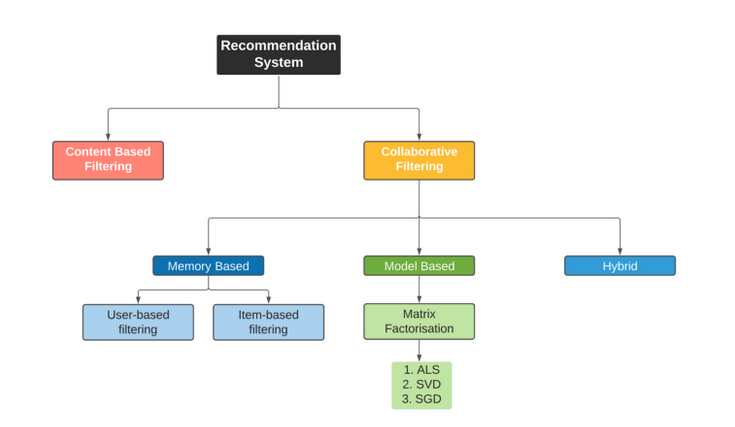

## EDA

### Variables

Para esta primera parte del proyecto utilizaremos los `Ratings` de los usuarios. Exploremos las particularidades de cada variable.

In [ ]:
n_ratings = len(ratings)
n_exercises = ratings['idexercise'].nunique()
n_users = ratings['idusergym'].nunique()

print(f"Numero de ratings: {n_ratings}")
print(f"Numero de idexercise's unicos: {n_exercises}")
print(f"Numero de usuarios unicos: {n_users}")
print(f"Numero promedio de ratings generados por usuario: {round(n_ratings/n_users, 2)}")
print(f"Numero promedio de ratings por ejercicio: {round(n_ratings/n_exercises, 2)}")

Numero de ratings: 818
Numero de idexercise's unicos: 58
Numero de usuarios unicos: 50
Numero promedio de ratings generados por usuario: 16.36
Numero promedio de ratings por ejercicio: 14.1


Ahora analisemos el comportamiento por usuario

In [ ]:
user_freq = ratings[['idusergym', 'idexercise']].groupby('idusergym').count().reset_index()
user_freq.columns = ['idusergym', 'n_ratings']
user_freq.head()

,idusergym,n_ratings
0,1247,18
1,1248,14
2,1249,12
3,1251,15
4,1252,15


In [ ]:
user_freq.describe()

,idusergym,n_ratings
count,50.000000,50.000000
mean,1291.160000,16.360000
std,26.804173,1.770046
min,1247.000000,12.000000
25%,1270.500000,15.000000
50%,1293.500000,16.500000
75%,1314.500000,18.000000
max,1333.000000,19.000000


+ En **promedio** cada usuario ha calificado 16 peliculas, esto es una buena noticia.  
+ El usuario que ha calificado menos peliculas es 12, lo cual no esta nada mal. 

In [ ]:
ratings['calificacion'].describe()

count    818.000000
mean       2.922983
std        1.394230
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: calificacion, dtype: float64

Podemos obserbar que nuestros usuarios son lo que Jill llama optimistas. Veamos el percentil 25, de este podemos deducir que por lo menos el 75% de las calificaciones son mayores o iguales a 3.

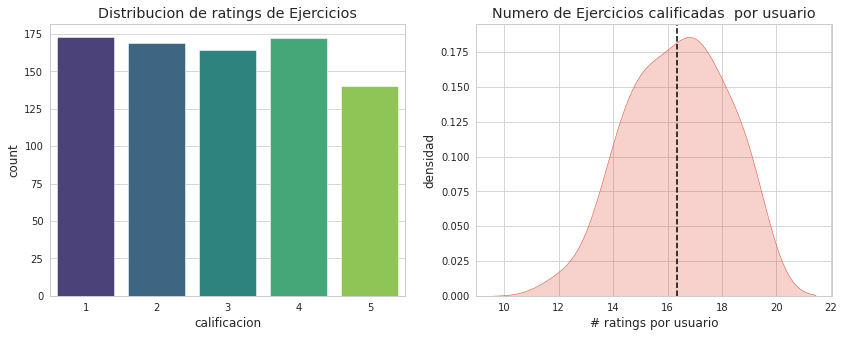

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="calificacion", data=ratings, palette="viridis")
plt.title("Distribucion de ratings de Ejercicios")

plt.subplot(1,2,2)
ax = sns.kdeplot(user_freq['n_ratings'], shade=True, legend=False)
plt.axvline(user_freq['n_ratings'].mean(), color="k", linestyle="--")
plt.xlabel("# ratings por usuario")
plt.ylabel("densidad")
plt.title("Numero de Ejercicios calificadas  por usuario")
plt.show()

Podemos observar que nuestras calificacione so ratings estan sesgados uno poco hacia la derecha parece que las personas no son bastante optimistas.

### Que Ejercicios tiene los ratings mas extremos?

In [ ]:
mean_rating = ratings.groupby('idexercise')[['calificacion']].mean()

lowest_rated = mean_rating['calificacion'].idxmin()
exercise.loc[exercise['id'] == lowest_rated]

,id,bodyPart,equipment,gifUrl,name_ejercise,target,estatus
28,158,pecho,cable,http://d205bpvrqc9yn1.cloudfront.net/0158.gif,cable decline fly,pectorals,1


In [ ]:
highest_rated = mean_rating['calificacion'].idxmax()
exercise.loc[exercise['id'] == highest_rated]

,id,bodyPart,equipment,gifUrl,name_ejercise,target,estatus
38,177,espalda,cable,http://d205bpvrqc9yn1.cloudfront.net/0177.gif,cable lateral pulldown (with rope attachment),lats,1


cable lateral pulldown (with rope attachment) es el ejercicio con mejores calificaciones, pero cuantas calificaciones tiene?

In [ ]:
ratings[ratings['idexercise']==highest_rated]

,id,idexercise,idusergym,calificacion
19,1526,177,1303,4
82,1589,177,1322,4
120,1627,177,1311,5
261,1768,177,1282,4
289,1796,177,1252,4
390,1897,177,1247,1
430,1937,177,1257,5
478,1985,177,1277,5
764,2271,177,1294,5


Podemos observar que cable lateral pulldown (with rope attachment) solo tiene 9 calificaciones, lo que nos plantea el problema de tener muestras pequeñas. Recordemos que muestras pequeñas tiended a tener resultados extremos ya sea altos o bajos.


### Distribucion de Ratings

In [ ]:
ratings_per_exercise = ratings.groupby('idexercise', as_index=False).agg({'calificacion':['count', 'mean', 'std']})
ratings_per_exercise.columns = ['idexercise', 'n_ratings', 'mean_ratings', 'std_ratings']
ratings_per_exercise.head()

,idexercise,n_ratings,mean_ratings,std_ratings
0,59,14,3.285714,1.325987
1,65,18,3.222222,1.165966
2,68,19,3.421053,1.216360
3,75,17,2.647059,1.320094
4,88,16,2.375000,1.408309


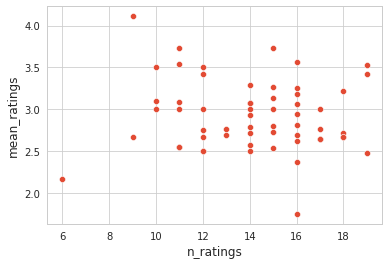

In [ ]:
sns.scatterplot(data=ratings_per_exercise, x='n_ratings', y='mean_ratings')

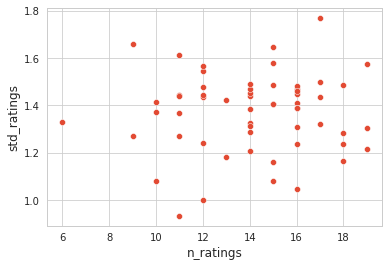

In [ ]:
sns.scatterplot(data=ratings_per_exercise, x='n_ratings', y='std_ratings')

### Bayesian Average

La media Bayesiana se define como:

$r_{i} = \frac{C \times m + \ \Sigma{ \ \text{reviews}}}{C+N}$  

+ $C:=$ representa cuanto valoramos nuestro valor inicial o confianza. Cuanto valoramos nuestras creencias (belief)?
+ $m:=$ representa nuestro prior. Cual creemos que es el valor real?
+ $N:=$ es el total de reviews para la pelicula $i$.  


Para nuestro modelos sugerimos que $m$ sea la media de nuestra muestra (`ratings['rating'].mean()`). Por la eleccion de nuestra prior, $C$ representa "el numero de observaciones de nuestro dataset". Entonces $C$ puede ser el numero promedio de ratings por pelicula, osea, cuantos calificaciones ne promedio tiene una pelicula.  

Podemos entender el promedio bayesiano como un promedio ponderado, donde el factor de ponderacion esta dado por el promedio de reviews en todas la peliculas $C$, mientras que la otra ponderacion esta dada por los reviews de la pelicula que estemos analizando $N$.  
$r_{i} = \frac{C \times m }{C+N} + \frac{\Sigma{ \ \text{reviews}}}{C+N}$  
  
$r_{i} = \frac{C}{C+N}\times m + \frac{N}{C+N}\times \mu_{reviews}$

In [ ]:
ejercise_stats = ratings.groupby('idexercise')[['calificacion']].agg(['count', 'mean'])
ejercise_stats.columns = ejercise_stats.columns.droplevel()

In [ ]:
C = ejercise_stats['count'].mean()
m = ejercise_stats['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return bayesian_avg

bayesian_avg_ratings = ratings.groupby('idexercise')['calificacion'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['idexercise', 'bayesian_avg']
ejercise_stats = ejercise_stats.merge(bayesian_avg_ratings, on='idexercise')

In [ ]:
exercise.rename(columns={'id':'idexercise',
                        'name_ejercise':'name_ejercise'},
               inplace=True)



In [ ]:
ejercise_stats = ejercise_stats.merge(exercise[['idexercise', 'name_ejercise']])
ejercise_stats['diff'] = ejercise_stats['mean'] - ejercise_stats['bayesian_avg'] 
ejercise_stats.sort_values('bayesian_avg', ascending=False).head()

,idexercise,count,mean,bayesian_avg,name_ejercise,diff
38,177,9,4.111111,3.390000,cable lateral pulldown (with rope attachment),0.721111
9,109,15,3.733333,3.343957,barbell standing overhead triceps extension,0.389376
12,115,11,3.727273,3.279258,barbell stiff leg good morning,0.448014
42,188,19,3.526316,3.272188,cable middle fly,0.254128
33,168,16,3.562500,3.266094,cable hip adduction,0.296406


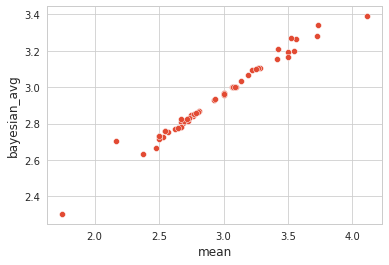

In [ ]:
sns.scatterplot(data=ejercise_stats, x='mean', y='bayesian_avg')


Podemos observar que la relacion entre ambas es casi lineal

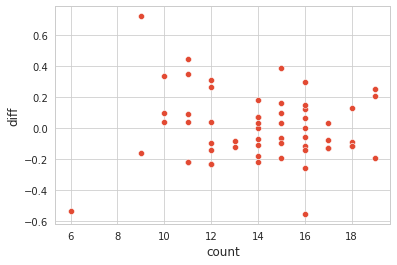

In [ ]:
sns.scatterplot(data=ejercise_stats, x='count', y='diff')

Usando la media bayesiana, podemos ver que `cable lateral pulldown (with rope attachment)`, `barbell standing overhead triceps extension`, y `barbell stiff leg good morning	` son las peliculas con mejores ratings.

In [ ]:
ejercise_stats.sort_values('bayesian_avg', ascending=False).head()

,idexercise,count,mean,bayesian_avg,name_ejercise,diff
38,177,9,4.111111,3.390000,cable lateral pulldown (with rope attachment),0.721111
9,109,15,3.733333,3.343957,barbell standing overhead triceps extension,0.389376
12,115,11,3.727273,3.279258,barbell stiff leg good morning,0.448014
42,188,19,3.526316,3.272188,cable middle fly,0.254128
33,168,16,3.562500,3.266094,cable hip adduction,0.296406


In [ ]:
ejercise_stats.sort_values('bayesian_avg', ascending=True).head()

,idexercise,count,mean,bayesian_avg,name_ejercise,diff
28,158,16,1.750000,2.302749,cable decline fly,-0.552749
4,88,16,2.375000,2.634937,barbell seated calf raise,-0.259937
6,98,19,2.473684,2.668021,barbell side split squat,-0.194337
26,154,6,2.166667,2.702058,cable cross-over revers fly,-0.535392
43,191,14,2.500000,2.715706,cable one arm lateral bent-over,-0.215706


Las peores peliculas son `cable decline fly`, `barbell seated calf raise`, y `barbell side split squat`.

##  Filtro colaborativo


Ahora aplicaremos la tecnica de filtro colaborativo [collaborative filtering](https://en.wikipedia.org/wiki/Collaborative_filtering) para generar recomendaciones a los usuarios. El supuesto de por que este filtro funciona se llama **"homophily"**. La idea es que a los ususarios les gustan cosas similares.  
  
El filtro colaborativo es una tecnica no supervisada que trata de hacer recomendaciones o predicciones sobre los intereses de las personas modelando los gustos de la poblacion en general. Por ejemplo, si casi todas las personas que les gusto `cable middle fly	` les gusto `cable cross-over revers fly	-`, es decir las calificaron con valores altos, nuestro modelo recomendera `Johncable cross-over revers fly	-` a las personas que les gusto `cable middle fly` y viceversa.  

Recuerda que este filtro es **item-item** por lo que estamos buscando similitudes en las peliculas, no ente usuarios

### Crear user-item-matrix

El primer paso es crear `user-item matrix` - o "utility" matrix. En esta matriz, las filas representan usuarios, y las columnas `items`. La belleza es que esta enteramente basada en los ratings, realmente no tenemos mas informacion sobre el genero, tipo, duracion, etc.. de las peliculas. Solo tenemos calificaciones.

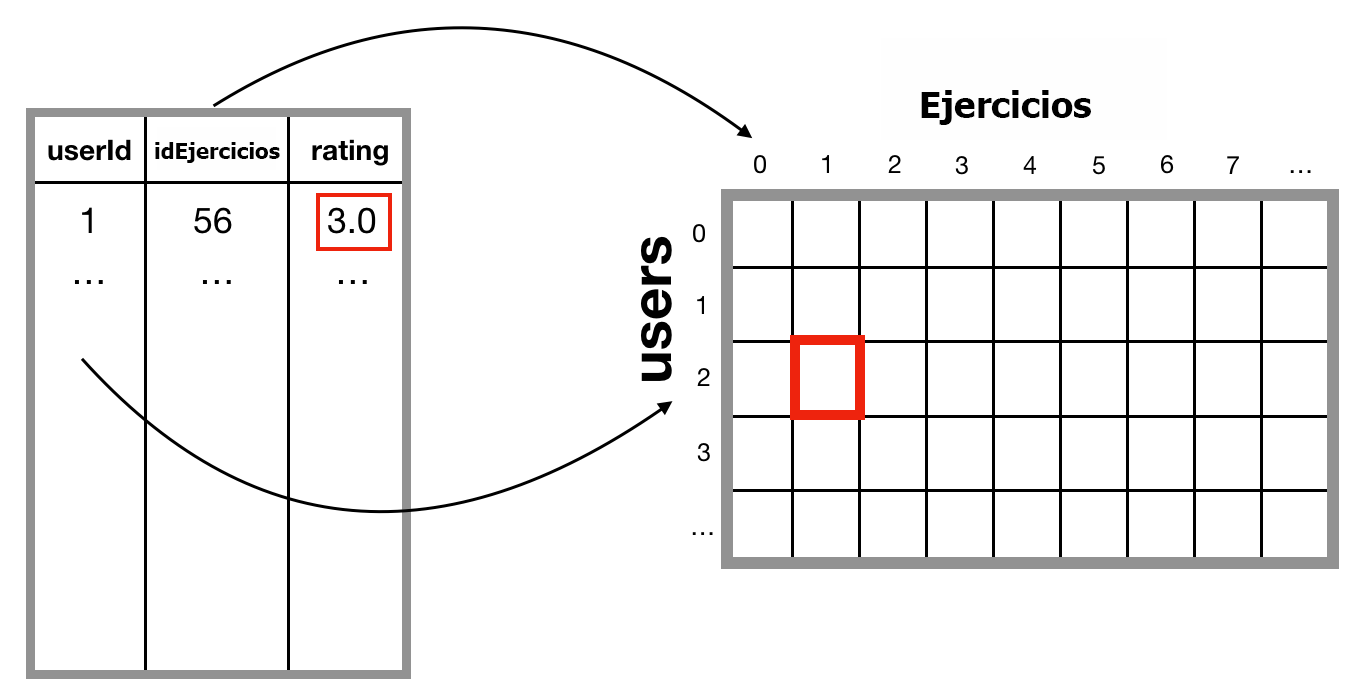


La funcion `create_X()` regresa una matriz de scipy rala (sparse) con 4 diccionarios.
- **user_mapper:**: id de usuario -> indice de usuario 
- **ejercise_mapper:** id de exercicio -> indice de exercicio 
- **user_inv_mapper:** indice de usuario -> id de usuario
- **ejercise_inv_mapper:** id de exercicio -> indice de exercicio  
  
NEcesitamos estos diccionarios porque nos indicaran que fila y columa de la `utility-matrix` corresponde al usuario y al exercicio. 
 **X** (user-item) matrix es de tipo [scipy.sparse.csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html).

In [ ]:
from scipy.sparse import csr_matrix

def create_X(df):
    
    N = df['idusergym'].nunique()
    M = df['idexercise'].nunique()

    user_mapper = dict(zip(np.unique(df["idusergym"]), list(range(N))))
    ejercise_mapper = dict(zip(np.unique(df["idexercise"]), list(range(M))))
    
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["idusergym"])))
    ejercise_inv_mapper = dict(zip(list(range(M)), np.unique(df["idexercise"])))
    
    user_index = [user_mapper[i] for i in df['idusergym']]
    ejercise_index = [ejercise_mapper[i] for i in df['idexercise']]

    X = csr_matrix((df["calificacion"], (ejercise_index, user_index)), shape=(M, N))
    
    return X, user_mapper, ejercise_mapper, user_inv_mapper, ejercise_inv_mapper

In [ ]:
X, user_mapper, ejercise_mapper, user_inv_mapper, ejercise_inv_mapper = create_X(ratings)

Midamos el sparsity o que tan rala es nuestra matriz X.

Calculemos el cociente por el numero de elementos que no estan vacios entre el numero de elementos totales. 

$$S=\frac{\text{# elementos no vacios}}{\text{# de elementos totales}}$$

In [ ]:
X.shape

(58, 50)

Dada la estructura de `csr_matrix` los elementos vacios son llenados como ceros, aunque realmente no son ceros sino que estan vacios. Pero dado que vamos a obtener distancias nos conviene ponerlos como ceros.

In [ ]:
sparsity = X.count_nonzero()/(X.shape[0]*X.shape[1])

print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 28.21%


Solo el 28.21% de las celdas estan llenas. Pero, no te desanimes! Una buena regla de dedo para implementar estos modelos es tener un indice mayor a .5%.

## Recomendacion con K-vecinos mas cercanos


<img src="https://github.com/topspinj/recommender-tutorial/blob/master/images/knn.png?raw=1" width="20%" align="right"/> 

La idea de utilizar la matriz de utilidad y vecinos mas cercanos es encontrar que peliculas se encuentran a menor distancia. Y seleccionar las $k$ mas cercanas como recomendacion. Existen diferentes tipos de distancias:

1. Cosine similarity
2. Euclidean distance
3. Manhattan distance
4. Pearson correlation 

`find_similar_ejercise()`  toma el `idexercise` y el `user-item` de la matriz X, y regresa las lista de $k$ ejercicios más cercanas.

Tenemos que crear otro diccionario que vaya de `idexercise` a `name_ejercise` para interpretar nuestros resultados.

In [ ]:
exercise_titles = dict(zip(exercise['idexercise'], exercise['name_ejercise']))

In [ ]:
from sklearn.neighbors import NearestNeighbors

def find_similar_exercise(exercise_id, X, k, metric='cosine', show_distance=False):
    
    neighbour_ids = []
    
    exercise_ind = ejercise_mapper[exercise_id]
    exercise_vec = X[exercise_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="auto", metric=metric, n_jobs=-1)
    kNN.fit(X)
    if isinstance(exercise_vec, (np.ndarray)):
        exercise_vec = exercise_vec.reshape(1,-1)
    # Solo calculamos la distancia usando a los ratings de personas que vieron la pelicula   
    # Si los usuarios no vieron la pelicula entonces los ignoramos
    
    neighbour = kNN.kneighbors(exercise_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(ejercise_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [ ]:
exercise_id = 75

similar_ids = find_similar_exercise(exercise_id, X, k=10)
exercise_title = exercise_titles[exercise_id]

print(f"Por que viste {exercise_title}")
for i in similar_ids:
    print(exercise_titles[i])

Por que viste barbell rear delt raise
barbell standing wide-grip curl
cable high row (kneeling)
barbell one leg squat
cable incline pushdown
barbell single leg split squat
cable overhead triceps extension (rope attachment)
barbell side split squat
cable cross-over variation
biceps narrow pull-ups
barbell standing bradford press


In [ ]:
exercise_id = 75
similar_ids = find_similar_exercise(exercise_id, X, k=10, metric="euclidean")
exercise_title = exercise_titles[exercise_id]

print(f"Por que viste {exercise_title}")
for i in similar_ids:
    print(exercise_titles[i])

Por que viste barbell rear delt raise
cable cross-over revers fly
cable high row (kneeling)
barbell standing wide-grip curl
barbell upright row
barbell single leg split squat
cable lying fly
body-up
barbell side split squat
cable cross-over variation
cable lying extension pullover (with rope attachment)
